### Assignment 1 (3 scores):

- Use the Numpy library only to construct the Linear Regression model.
- Train and Evaluate that Linear Regression model on the [Forest Fires](https://archive.ics.uci.edu/static/public/162/forest+fires.zip) dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Preprocessing the data**

In [2]:
df = pd.read_csv("forestfires.csv")

In [3]:
for col_name in df.columns:
    print(f"Column {col_name}")
    print("Total NaN: ", df[col_name].isna().sum())
    print("Data type: ", df[col_name].dtype)
    print("Total null: ", df[col_name].isnull().sum())
    print("-"*10)

Column X
Total NaN:  0
Data type:  int64
Total null:  0
----------
Column Y
Total NaN:  0
Data type:  int64
Total null:  0
----------
Column month
Total NaN:  0
Data type:  object
Total null:  0
----------
Column day
Total NaN:  0
Data type:  object
Total null:  0
----------
Column FFMC
Total NaN:  0
Data type:  float64
Total null:  0
----------
Column DMC
Total NaN:  0
Data type:  float64
Total null:  0
----------
Column DC
Total NaN:  0
Data type:  float64
Total null:  0
----------
Column ISI
Total NaN:  0
Data type:  float64
Total null:  0
----------
Column temp
Total NaN:  0
Data type:  float64
Total null:  0
----------
Column RH
Total NaN:  0
Data type:  int64
Total null:  0
----------
Column wind
Total NaN:  0
Data type:  float64
Total null:  0
----------
Column rain
Total NaN:  0
Data type:  float64
Total null:  0
----------
Column area
Total NaN:  0
Data type:  float64
Total null:  0
----------


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
df.select_dtypes('object')

,month,day
0,mar,fri
1,oct,tue
2,oct,sat
3,mar,fri
4,mar,sun
...,...,...
512,aug,sun
513,aug,sun
514,aug,sun
515,aug,sat


In [6]:
df['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [7]:
month_map_dict = {
        'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
        'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
        'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
    }

day_map_dict = {
        'fri': 6, 'tue': 3, 'sat': 7, 'sun': 1, 'mon': 2, 'wed': 4, 'thu': 5
    }

df['month'] = df['month'].map(month_map_dict)
df['day'] = df['day'].map(day_map_dict)
y = df['area'].copy()
X = df[[i for i in df.columns if i != 'area']].copy()

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 48.6 KB


In [9]:
# Thêm intercept Beta0:
X_new = np.c_[np.ones(X.shape[0],int),X]

In [10]:
X_new.shape

(517, 13)

**Model**
- *Sum of square error*: 
$$
    E(X, y, \beta) = \frac{1}{2}\sum_{i=1}^n{(y_n - f(x_n))^2} = \frac{1}{2}\sum_{i=1}^n{(y_n - x_n \beta)^2} = \frac{1}{2} ||y - \beta X||^2
$$

- *Mean Square error (MSE)*:
$$
    E(X, y, \beta) = \frac{1}{n}\sum_{i=1}^n{(y_n - f(x_n))^2} = \frac{1}{n}\sum_{i=1}^n{(y_n - x_n \beta)^2} = \frac{1}{n} ||y - \beta X||^2
$$

- *Root mean square error (RMSE)*:
$$
    E(X, y, \beta) = \sqrt{\frac{1}{n}\sum_{i=1}^n{(y_n - f(x_n))^2}} = \sqrt{\frac{1}{n}\sum_{i=1}^n{(y_n - x_n \beta)^2}} = \sqrt{\frac{1}{n} ||y - \beta X||^2}
$$

- The **Ordinary Least Square** (OLS) estimator:
$$
    \hat{\beta} = (X^TX)^{-1} X^Ty
$$


In [11]:
y = np.array(y)
y = y.reshape(-1,1)

In [12]:
class LinearRegression:
    def mse(self, y: np.ndarray, y_pred: np.ndarray):
        delta = y - y_pred
        return (np.mean(delta**2))
    
    def fit(self, y: np.ndarray, X: np.ndarray):
        self.theta_ : np.ndarray = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X: np.ndarray):
        y_pred = X @ self.theta_
        return y_pred

In [13]:
lr = LinearRegression()
lr.fit(y,X_new)

In [14]:
y_pred = lr.predict(X_new)

In [15]:
mse = lr.mse(y=y, y_pred=y_pred)

In [16]:
mse

np.float64(3941.7017448546594)

### Assignment 2 (3 scores):

- Standardize the data so that their mean is $0$ and their variance is $1$.
- Compare the results of Linear Regression model when being trained on the original and standardized data.

In [17]:
class ZscoreScaler:
    
    def __init__(self):
        mean_ = None
        std_ = None

    def fit(self, X: pd.DataFrame):
        self.mean_ = X.mean()
        self.std_ = X.std()

    def transform(self, X: pd.DataFrame):
        X = (X - self.mean_)/self.std_
        return X
    
    def fit_transform(self, X: pd.DataFrame):
        self.fit(X)
        return self.transform(X)

In [18]:
scaler = ZscoreScaler()
X_scaled = scaler.fit_transform(X)

# Thêm intercept:
X_scaled_new = np.c_[np.ones(X_scaled.shape[0],int),X_scaled]
X_scaled_new

array([[ 1.        ,  1.00733714,  0.56930904, ...,  0.41132597,
         1.49716438, -0.07319742],
       [ 1.        ,  1.00733714, -0.24376492, ..., -0.69178627,
        -1.74007034, -0.07319742],
       [ 1.        ,  1.00733714, -0.24376492, ..., -0.69178627,
        -1.51681277, -0.07319742],
       ...,
       [ 1.        ,  1.00733714, -0.24376492, ...,  1.57572222,
         1.49716438, -0.07319742],
       [ 1.        , -1.58582453, -0.24376492, ..., -0.14023015,
        -0.0098242 , -0.07319742],
       [ 1.        ,  0.57514353, -1.05683889, ..., -0.8143543 ,
         0.26924776, -0.07319742]])

In [19]:
# So sánh với khi train trên data được scale
lr_new = LinearRegression()
lr_new.fit(y,X_scaled_new)
y_pred_scaleddata = lr_new.predict(X_scaled_new)
mse_new = np.float64(lr_new.mse(y, y_pred_scaleddata))

In [20]:
print(mse_new)

3941.70174485466


In [21]:
print('Chênh lệch trước và sau chuẩn hóa: ', mse-mse_new)

Chênh lệch trước và sau chuẩn hóa:  -4.547473508864641e-13


#### Data normalization

The OLS estimator of a linear regression model has the form

$$
    \hat{\beta} = (X^T X)^{-1} X^T y
$$
where $X^T X \in \mathbb{R}^{K \times K}$ is called the normal matrix of the **Gram Matrix**.

Considering the convariance of $X$, we have

\begin{align}
    Cov(X)  & = \mathbb{E}[(X - \mathbb{E}[X])^2] \\
            & = \mathbb{E}[X^T X - 2 X^T\mathbb{E}[X] + \mathbb{E}[X]^T \mathbb{E}[X]] \\
            & = \mathbb{E}[X^T X] - 2 \mathbb{E}[X^T\mathbb{E}[X]] + \mathbb{E}[X]^T \mathbb{E}[X] \\
            & = \mathbb{E}[X^T X] - 2 \mathbb{E}[X]^T\mathbb{E}[X] + \mathbb{E}[X]^T \mathbb{E}[X] \\
            & = \mathbb{E}[X^T X] - \mathbb{E}[X]^T \mathbb{E}[X] \\
\end{align}

In case we have $\mathbb{E}[X] = 0$, then $X^T X = Cov(X)$. The normalization helps we to have the numerical stability of the input, theoretically leads to stable calculation when being applied to unseen data.

### Assignment 3 (2 scores):

- Perform feature engineering to remove columns that are linearly dependent (colinear) with other columns in the dataset.
- Evaluate the Linear Regression model when beeing trained on the original data and preprocessed data.

<Axes: title={'center': 'Correlation Matrix'}>

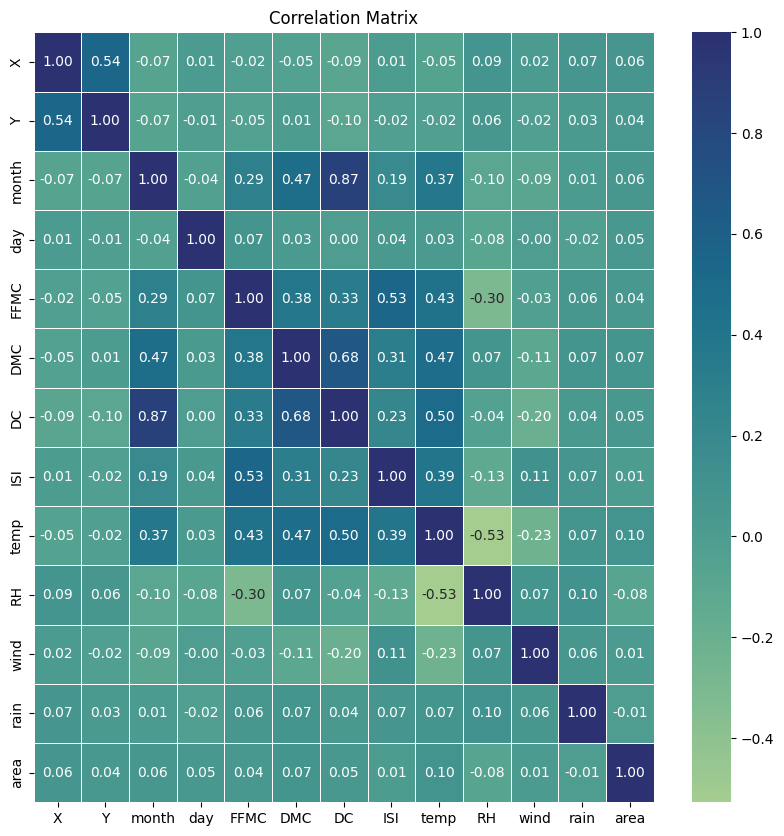

In [22]:
corr_matrix = df.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation Matrix')
sns.heatmap(data=corr_matrix,cmap='crest',annot=True,linewidths=0.5,fmt='.2f')

**Colinearity (numerical variables)**
- 2 biến (không bao gồm biến mục tiêu) có tương quan với nhau cao -> bỏ 1 biến
- Biến <=> Biến mục tiêu -> đánh trọng số cao cho Biến

- Các cột có tương quan cao: DC và month (0.87)

In [24]:
# Bỏ cột tương quan tuyến tính cao với cột còn lại
X_preprocessed = X[[i for i in X.columns if i != 'DC']].copy()

# Scale data
scaler_preprocessed = ZscoreScaler()
X_preprocessed = scaler_preprocessed.fit_transform(X_preprocessed)

# Thêm intercept
X_preprocessed = np.c_[np.ones(X_preprocessed.shape[0],int),X_preprocessed]

# Chạy linear regression
lr_preprocessed_data = LinearRegression()
lr_preprocessed_data.fit(y,X_preprocessed)

y_preprocessed = lr_preprocessed_data.predict(X_preprocessed)
mse_preprocessed = lr_preprocessed_data.mse(y,y_preprocessed)

print('MSE với data được tiền xử lý (scale, loại bỏ 1 cột): ', mse_preprocessed)
print('Chênh lệch MSE so với mô hình chạy trên data chưa được tiền xử lý: ', abs(mse_preprocessed - mse))

MSE với data được tiền xử lý (scale, loại bỏ 1 cột):  3949.2287487089698
Chênh lệch MSE so với mô hình chạy trên data chưa được tiền xử lý:  7.527003854310351


- Sau khi bỏ 1 cột, MSE tăng nhẹ, nhưng mô hình đỡ bị đa cộng tuyến hơn

#### On the Problem of Colinearity

As stated previously, the OLS of the linear regression model is achieved by assuming that $rank(X) = K$ or $det(X) \ne 0$. So that removing columns in $X$ having colinearity with other columns is to ensure that assumption of the full rank condition of $X$. In the case $det(X) = 0$, then the **Moore-Penrose inverse** will be applied to determine the pseudo-inverse matrix of $X^T X$.

### Assignment 4 (2 scores):

- Implement the Linear Regression model using Machine Learning libraries (Scikit Learn or SKorch).
- Compare the results of Linear Regression model constructed manually and from Machine Learning libraries.

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_preprocessed,y)

y_pred_sklearn = model.predict(X_preprocessed)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
print('MSE của mô hình tự code Numpy: ', mse_preprocessed)
print('MSE của sklearn: ', mse_sklearn)
print('Sai lệch của 2 mô hình: ', abs(mse_preprocessed - mse_sklearn))

MSE của mô hình tự code Numpy:  3949.2287487089698
MSE của sklearn:  3949.2287487089698
Sai lệch của 2 mô hình:  0.0


Mô hình có sẵn trong sklearn giúp huấn luyện nhanh hơn trong khi không có chênh lệch giữa MSE của mô hình có sẵn và mô hình tự làm bằng Numpy